In [1]:
import pandas as pd
from itertools import groupby
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('transaction.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
print(df)


       InvoiceNo  StockCode  ...  CustomerID               Country
0         537626      22725  ...       12347               Iceland
1         537626      22729  ...       12347               Iceland
2         537626      22195  ...       12347               Iceland
3         542237      22725  ...       12347               Iceland
4         542237      22729  ...       12347               Iceland
...          ...        ...  ...         ...                   ...
10541     543911      21700  ...       17829  United Arab Emirates
10542     543911      22111  ...       17829  United Arab Emirates
10543     543911      22112  ...       17829  United Arab Emirates
10544     564428      23296  ...       17844                Canada
10545     564428      23294  ...       17844                Canada

[10546 rows x 6 columns]


In [4]:
german = df[df.Country == 'Germany']
print(german)
year = german['InvoiceDate'].dt.year == 2011
german.loc[year]
print(german)

      InvoiceNo  StockCode  Qty         InvoiceDate  CustomerID  Country
1185     554985      21746  628 2011-05-29 12:26:00       12426  Germany
1186     554985      21770  981 2011-05-29 12:26:00       12426  Germany
1187     554985      22329  212 2011-05-29 12:26:00       12426  Germany
1188     554985      22976  910 2011-05-29 12:26:00       12426  Germany
1189     554985      22845  668 2011-05-29 12:26:00       12426  Germany
...         ...        ...  ...                 ...         ...      ...
8339     565430      22725  562 2011-09-04 13:07:00       14335  Germany
8340     565430      22729  692 2011-09-04 13:07:00       14335  Germany
8341     565430      22302  400 2011-09-04 13:07:00       14335  Germany
8342     578273      22725  769 2011-11-23 13:41:00       14335  Germany
8343     578273      23309  842 2011-11-23 13:41:00       14335  Germany

[2269 rows x 6 columns]
      InvoiceNo  StockCode  Qty         InvoiceDate  CustomerID  Country
1185     554985      21746

In [5]:
TotalQty=german.groupby(german['InvoiceDate'].dt.month).sum()
Total = TotalQty['Qty']
print(Total)

InvoiceDate
1     101266
2      37800
3      72084
4      60993
5     103749
6      79711
7      96423
8     120908
9     104487
10    159490
11    143409
12     95832
Name: Qty, dtype: int64


In [6]:
d = {'col1': [1, 2, 3, 4, 5 , 6, 7, 8 , 9 ,10, 11, 12]}
month = pd.DataFrame(data=d)

lin_reg = LinearRegression()
lin_reg.fit(month, Total)

a = lin_reg.intercept_
b = lin_reg.coef_

print("Intercept: ", a)
print("Slope (Regression coefficient) ", b)

Intercept:  57371.575757575774
Slope (Regression coefficient)  [6252.47552448]


In [7]:
x=[1, 2, 3, 4, 5 , 6, 7, 8 , 9 ,10, 11, 12, 13]

y = a + b*x

print(y)

[ 63624.05128205  69876.52680653  76129.002331    82381.47785548
  88633.95337995  94886.42890443 101138.9044289  107391.37995338
 113643.85547786 119896.33100233 126148.80652681 132401.28205128
 138653.75757576]


In [8]:
yb=y[3:12]

Total_list = Total.values.tolist()
Totalbaru = Total_list[3:12]

print("Data Aktual 9 bulan terakhir")
print(yb)
print("Data Prediksi 9 bulan terakhir")
print(Totalbaru)

Data Aktual 9 bulan terakhir
[ 82381.47785548  88633.95337995  94886.42890443 101138.9044289
 107391.37995338 113643.85547786 119896.33100233 126148.80652681
 132401.28205128]
Data Prediksi 9 bulan terakhir
[60993, 103749, 79711, 96423, 120908, 104487, 159490, 143409, 95832]


In [9]:
mae = metrics.mean_absolute_error(yb, Totalbaru)
mse = metrics.mean_squared_error(yb, Totalbaru)
mape = metrics.mean_absolute_error(yb, Totalbaru)*100

print("MAE  : ",mae)
print("MSE  : ",mse)
print("MAPE : ",mape)

MAE  :  19165.719761719767
MSE  :  489766369.9131863
MAPE :  1916571.9761719767


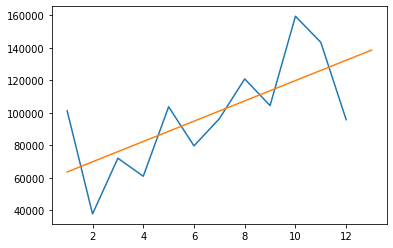

In [10]:
plt.plot(month, Total)
plt.plot(x, y)
plt.show()